In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
(train_img, train_label),(test_img, test_label) = datasets.mnist.load_data()

In [3]:
print(f"Training images shape is = {train_img.shape}")
print(f"Training labels shape is = {train_img.shape}")
print(f"Testing images shape is = {test_img.shape}")
print(f"Testing labels shape is = {test_img.shape}")

Training images shape is = (60000, 28, 28)
Training labels shape is = (60000, 28, 28)
Testing images shape is = (10000, 28, 28)
Testing labels shape is = (10000, 28, 28)


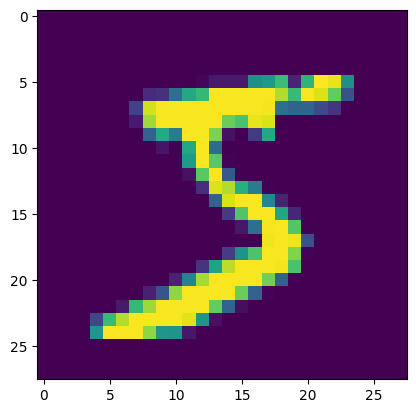

In [4]:
plt.imshow(train_img[0])

In [5]:
train_label[0]

5

In [6]:
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
vgg = models.Sequential([
  
  layers.Conv2D(filters = 64, kernel_size=(3, 3) ,padding ='same', strides = 1, activation = 'relu', input_shape = (28,28,1)),
  layers.ZeroPadding2D((2,2)),
  layers.Conv2D(filters = 64, kernel_size=(3, 3) ,padding ='same', strides= 1, activation = 'relu'),
  layers.Conv2D(filters = 64, kernel_size=(3, 3) ,padding ='same', strides= 1, activation = 'relu'),
  layers.MaxPooling2D((2,2), strides = 2 ),
  
  layers.Conv2D(filters = 128, kernel_size=(3, 3) ,padding ='same', strides= 1, activation = 'relu'),
  layers.Conv2D(filters = 128, kernel_size=(3, 3) ,padding ='same', strides= 1, activation = 'relu'),
  layers.MaxPooling2D((2,2), strides = 2 ),
  
  layers.Conv2D(filters = 256, kernel_size=(3, 3) ,padding ='same', strides= 1, activation = 'relu'),
  layers.Conv2D(filters = 256, kernel_size=(3, 3) ,padding ='same', strides= 1, activation = 'relu'),
  layers.Conv2D(filters = 256, kernel_size=(3, 3) ,padding ='same', strides= 1, activation = 'relu'),
  layers.MaxPooling2D((2,2), strides = 2 ),
  
  layers.Flatten(),
  layers.Dense(1024, activation = 'relu'),
  layers.Dense(512, activation = 'relu'),
  layers.Dense(128, activation = 'relu'),
  layers.Dense(10, activation = 'softmax'),
  
])

In [8]:
vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
pTime =time.time()
vgg.fit(train_img, train_label, epochs=10)
cTime = time.time()

print(f"Total time taken = {cTime-pTime}")

Epoch 1/10


1875/1875 [==============================] - 558s 294ms/step - loss: 0.1883 - accuracy: 0.9429
Epoch 2/10
1875/1875 [==============================] - 452s 241ms/step - loss: 0.0712 - accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 436s 233ms/step - loss: 0.0620 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 429s 229ms/step - loss: 0.0487 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 434s 232ms/step - loss: 0.0486 - accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 430s 230ms/step - loss: 0.0414 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 424s 226ms/step - loss: 0.0427 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 428s 228ms/step - loss: 0.0369 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 416s 222ms/step - loss: 0.0383 - accuracy: 0.9905
Epoch 10/10
1875/1875 [=====================

In [10]:
vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 zero_padding2d (ZeroPaddin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       7

In [11]:
vgg.evaluate(test_img, test_label)

313/313 [==============================] - 26s 81ms/step - loss: 0.0444 - accuracy: 0.9895


[0.04435911402106285, 0.9894999861717224]

In [12]:
vgg.save("MNIST-digit-vgg.h5")

c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = vgg(test_img)
prediction = np.argmax(predictions, axis=1)

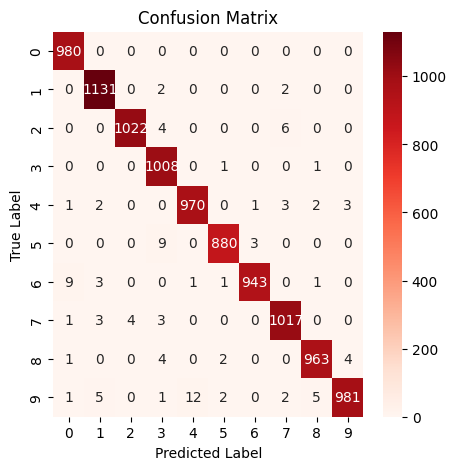

In [22]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(test_label,prediction), annot=True, fmt='d', cmap='Reds', xticklabels=np.arange(10), yticklabels=np.arange(10))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This tells that, 
* 12 times model predicted 9 as 4
* and so on with others